In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
ore= OrdinalEncoder()
from pandas.api.types import is_numeric_dtype
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [52]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv("test.csv")

In [53]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [54]:
df2.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [56]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [57]:
df2.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [58]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [59]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [60]:
df = df.drop(["ID",'Customer_ID','Month','Name','SSN'],axis=1)

In [61]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [62]:
df['Monthly_Balance'].isna().sum()

np.int64(1200)

# NaN value Handling

In [63]:
if df['Monthly_Balance'].dtype == 'object':
    df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

mean_val = df['Monthly_Balance'].value_counts().mean()
print(mean_val)

1.0


In [64]:
df['Monthly_Balance'].info

<bound method Series.info of 0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 100000, dtype: float64>

In [65]:
for col in df.columns:
    if is_numeric_dtype(df[col]): 
        df[col] = df[col].fillna(df[col].mean())
    else: 
        df[col] = df[col].fillna("nan")

In [66]:
df.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [67]:
x=df.drop(["Credit_Score"],axis=1)
y=df['Credit_Score']

In [68]:
x.shape, y.shape

((100000, 22), (100000,))

In [69]:
# Encoding
for i in x.columns:
    if is_numeric_dtype(x[i]):
        continue
    else:
        x[i]=ore.fit_transform(x[[i]])
x.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,308.0,12.0,6011.0,1824.843333,3,4,3,244.0,128.0,3,...,4.0,3.0,12062.0,26.822620,180.0,1.0,49.574949,81513.0,3.0,312.494089
1,308.0,12.0,6011.0,4194.170850,3,4,3,244.0,128.0,-1,...,4.0,1.0,12062.0,31.944960,404.0,1.0,49.574949,7661.0,4.0,284.629162
2,0.0,12.0,6011.0,4194.170850,3,4,3,244.0,128.0,3,...,4.0,1.0,12062.0,28.609352,184.0,1.0,49.574949,82226.0,5.0,331.209863
3,308.0,12.0,6011.0,4194.170850,3,4,3,244.0,128.0,5,...,4.0,1.0,12062.0,31.377862,185.0,1.0,49.574949,30358.0,6.0,223.451310
4,308.0,12.0,6011.0,1824.843333,3,4,3,244.0,128.0,6,...,4.0,1.0,12062.0,24.797347,186.0,1.0,49.574949,55363.0,2.0,341.489231


In [70]:
y.value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [71]:
y=y.replace({"Standard":1,"Poor":2,"Good":3})

In [72]:
y

0        3
1        3
2        3
3        3
4        3
        ..
99995    2
99996    2
99997    2
99998    1
99999    2
Name: Credit_Score, Length: 100000, dtype: int64

# Visualization

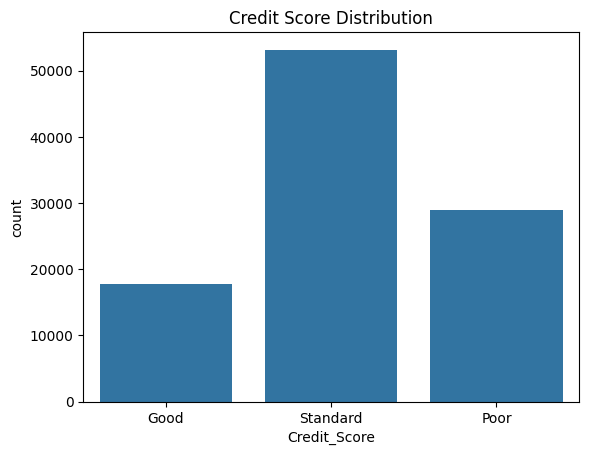

In [73]:
sns.countplot(data=df,x="Credit_Score")
plt.title('Credit Score Distribution')
plt.show()

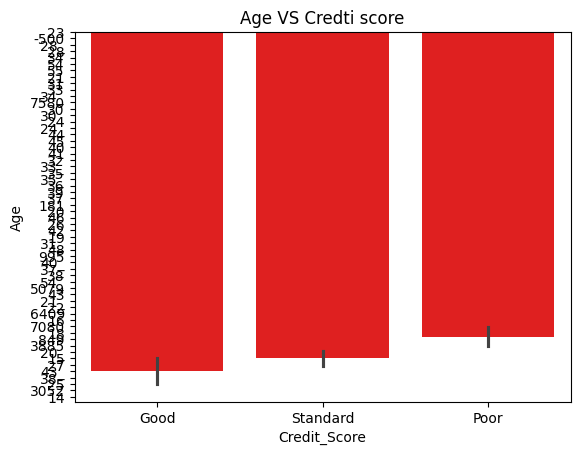

In [74]:

sns.barplot(data=df,x="Credit_Score",y="Age",color="r")
plt.title("Age VS Credti score")
plt.show()

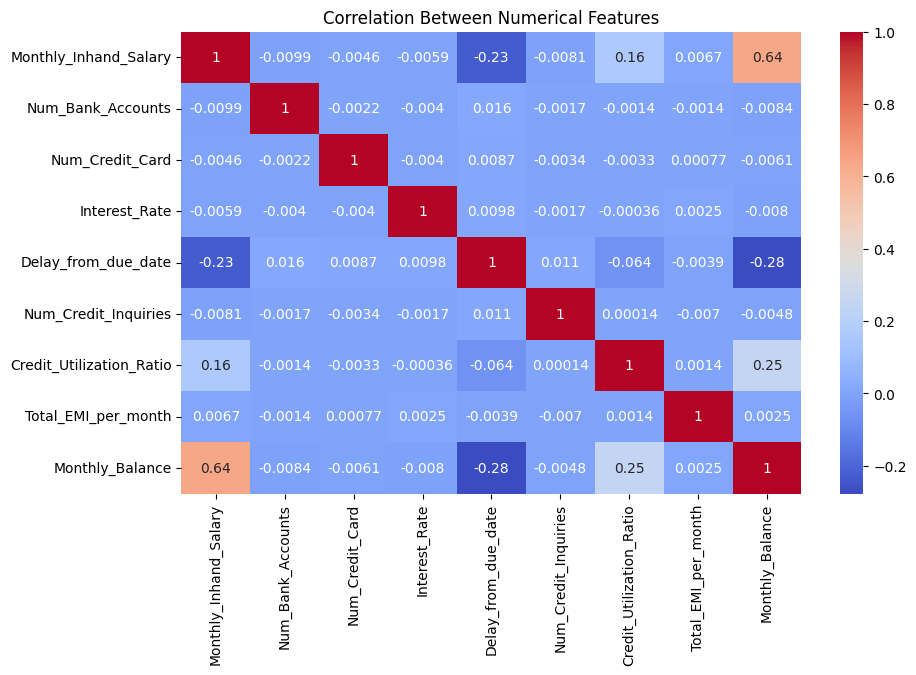

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

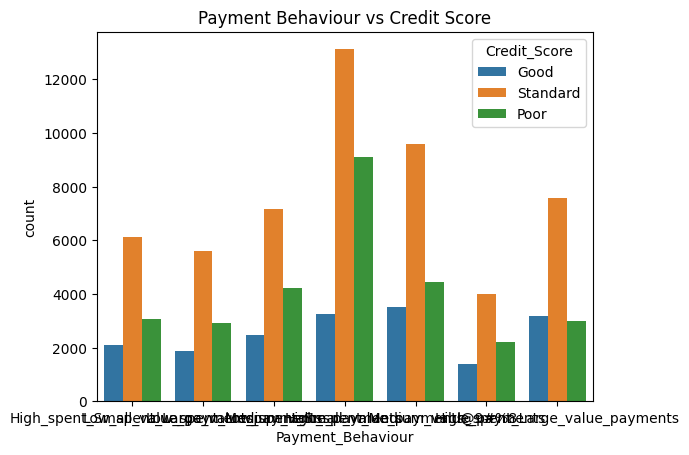

In [76]:
sns.countplot(data=df, x='Payment_Behaviour', hue='Credit_Score')
plt.title("Payment Behaviour vs Credit Score")
plt.show()


# feature selection

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
cls=LogisticRegression()
rfe = RFE(cls,n_features_to_select=7)

In [78]:
model=rfe.fit(x,y)

In [79]:
sele_f= model.support_
sele_f

array([False,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False])

In [80]:
selected_features = x.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Occupation', 'Num_of_Loan', 'Delay_from_due_date', 'Credit_Mix',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')


In [126]:
new_x = x[selected_features]
new_x


,Occupation,Num_of_Loan,Delay_from_due_date,Credit_Mix,Credit_Utilization_Ratio,Payment_of_Min_Amount,Payment_Behaviour
0,12.0,244.0,3,3.0,26.822620,1.0,3.0
1,12.0,244.0,-1,1.0,31.944960,1.0,4.0
2,12.0,244.0,3,1.0,28.609352,1.0,5.0
3,12.0,244.0,5,1.0,31.377862,1.0,6.0
4,12.0,244.0,6,1.0,24.797347,1.0,2.0
...,...,...,...,...,...,...,...
99995,9.0,174.0,23,3.0,34.663572,1.0,1.0
99996,9.0,174.0,18,3.0,40.565631,1.0,2.0
99997,9.0,174.0,27,1.0,41.255522,1.0,1.0
99998,9.0,174.0,20,1.0,33.638208,1.0,4.0


In [127]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
for i in new_x.columns:
    if is_numeric_dtype(new_x[i]):
        new_x[i] = std.fit_transform(new_x[[i]])
new_x.head()

,Occupation,Num_of_Loan,Delay_from_due_date,Credit_Mix,Credit_Utilization_Ratio,Payment_of_Min_Amount,Payment_Behaviour
0,0.964732,0.409569,-1.215932,1.402073,-1.067562,-0.58149,-0.230434
1,0.964732,0.409569,-1.485110,-0.571010,-0.066489,-0.58149,0.260855
2,0.964732,0.409569,-1.215932,-0.571010,-0.718376,-0.58149,0.752144
3,0.964732,0.409569,-1.081342,-0.571010,-0.177318,-0.58149,1.243433
4,0.964732,0.409569,-1.014048,-0.571010,-1.463366,-0.58149,-0.721723


In [128]:
xtrain,xtest,ytrain,ytest = train_test_split(new_x,y,test_size=.2,random_state=42)

In [94]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

In [84]:
for name, model in models.items():
    model.fit(xtrain,ytrain)
    print("model score",model.score(xtrain,ytrain))
    ypred=model.predict(xtest)
    score = accuracy_score(ytest,ypred)
    print(f"{name} Accuracy :{score}")

model score 0.584
Logistic Regression Accuracy :0.5823
model score 0.9999875
Random Forest Accuracy :0.61885
model score 1.0
Decision Tree Accuracy :0.54195
model score 0.7016125
KNN Accuracy :0.5739


In [95]:
rf = RandomForestClassifier(
    n_estimators=100,       
    max_depth=10,           
    min_samples_split=5,   
    min_samples_leaf=4,      
    random_state=42
)
model =rf.fit(xtrain,ytrain)
print("Train Score:", model.score(xtrain,ytrain))
print("Test Score:", model.score(xtest, ytest))

Train Score: 0.6526
Test Score: 0.63265


In [96]:
ypred=model.predict(xtest)
score = accuracy_score(ytest,ypred)
score

0.63265

In [97]:
pred = model.predict([[12.0	,244.0,	3,	3.0,	26.822620,	1.0,	3.0]])
pred

array([2])

In [113]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
model =grid.fit(xtrain, ytrain)
print(model.score(xtrain,ytrain))
print(grid.best_params_)

0.6393125
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [112]:
ypred=grid.predict(xtest)
score = accuracy_score(ytest,ypred)
score

0.6303

In [103]:
pred = grid.predict([[12.0	,244.0,	3,	3.0,	26.822620,	1.0,	3.0]])
pred

array([3])

In [108]:
new_x.loc[99998]


Occupation                    9.000000
Num_of_Loan                 174.000000
Delay_from_due_date          20.000000
Credit_Mix                    1.000000
Credit_Utilization_Ratio     33.638208
Payment_of_Min_Amount         1.000000
Payment_Behaviour             4.000000
Name: 99998, dtype: float64

In [111]:
pred1 = grid.predict([[4.0	,74.0,	20,	1.0,	33.638208,	1.0,	4.0]])
pred1

array([3])

In [115]:
new_x.head()

,Occupation,Num_of_Loan,Delay_from_due_date,Credit_Mix,Credit_Utilization_Ratio,Payment_of_Min_Amount,Payment_Behaviour
0,12.0,244.0,3,3.0,26.822620,1.0,3.0
1,12.0,244.0,-1,1.0,31.944960,1.0,4.0
2,12.0,244.0,3,1.0,28.609352,1.0,5.0
3,12.0,244.0,5,1.0,31.377862,1.0,6.0
4,12.0,244.0,6,1.0,24.797347,1.0,2.0


In [123]:
dt = DecisionTreeClassifier(max_depth=10,min_samples_split=20,min_samples_leaf=10,max_leaf_nodes=30,ccp_alpha=00.1)
model = dt.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.5321875

In [122]:
ypre= model.predict(xtest)
accuracy_score(ypre,ytest)

0.52995

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
model=rf.fit(xtrain,ytrain)
print(model.score(xtrain,ytrain))


1.0


In [130]:
ypre= model.predict(xtest)
accuracy_score(ypre,ytest)

0.62215